In [ ]:
pip install texthero

     |████████████████████████████████| 245kB 12.5MB/s 
     |████████████████████████████████| 1.5MB 42.2MB/s 
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.chdir("/content/gdrive/MyDrive")
!ls

'#AbolishICE.csv'		  '#internationalstudents.csv'
 attenderoff@block16.txt	   internationalstudents.csv
'batch 1_team3_projectfile.docx'  '#intlstudents.csv'
'CeRt!Fy'			   led.py
 Classroom			   LOCATION.py
 cleaned_strings		  'main (1).py'
 code.bz2			   MCP3008.py
'Colab Notebooks'		  'New folder'
 combined_csv.csv		  'news.zip (Unzipped Files)'
 coursecompcert.pdf		   passportfront_1.jpg
 database.sqlite		   pin1sms.py
 des.docx			   pin2sms.py
'#F1visa.csv'			  'Resume (1).gdoc'
 gps.py				   Resume.gdoc
'#h1b.csv'			   Reviews.csv
'#h1bjobs.csv'			   SENS_TEST.py
'HP BACKUP( AMAR )'		  'shortest path.docx'
 HP_FILES			  '#studyinusa.csv'
 IMG_20160813_181759.jpg	   survey.csv
 IMG_20160813_181820.jpg	   Test_sense.py
 IMG-20180615-WA0003.jpg	  'Wipro Imp Docs'


In [ ]:
import texthero as hero
import pandas as pd

df=pd.read_csv("/content/gdrive/MyDrive/combined_csv.csv")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df

,Tweet Id,Text,Name,Screen Name,UTC,Created At,Favorites,Retweets,Language,Client,Tweet Type,URLs,Hashtags,Mentions,Media Type,Media URLs
0,1.374886e+18,abolish nynj live us near whole life hie...,carb,carbnim,2021-03-25T00:48:30.000Z,Thu Mar 25 00:48:30 +0000 2021,0,0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Retweet,NaN,1,4,photo,https://pbs.twimg.com/media/ExQFRz7WYAID7Av.jpg
1,1.374886e+18,abolish nynj live us near whole life hie...,jacl seattl,jaclseattle,2021-03-25T00:47:52.000Z,Thu Mar 25 00:47:52 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/iphone"" r...",Retweet,NaN,1,4,photo,https://pbs.twimg.com/media/ExQFRz7WYAID7Av.jpg
2,1.374885e+18,womenbaseball1 defundpentagon defundpol aboli...,put the fun in fungibl,Lesley_NOPE,2021-03-25T00:44:51.000Z,Thu Mar 25 00:44:51 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/iphone"" r...",Retweet,NaN,3,0,NaN,NaN
3,1.374885e+18,defundpentagon defundpol abolish student loan ...,abolitionist,womenbaseball1,2021-03-25T00:43:51.000Z,Thu Mar 25 00:43:51 +0000 2021,1,1,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,NaN,3,0,NaN,NaN
4,1.374883e+18,vp potus necessari abolish,amypond420,AmyPond420_,2021-03-25T00:35:46.000Z,Thu Mar 25 00:35:46 +0000 2021,0,0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Reply,NaN,1,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9915,1.372040e+18,julianhillmp scotti promi australian wed f...,karamjeet singh brar,karamje12270455,2021-03-17T04:21:53.000Z,Wed Mar 17 04:21:53 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,5,0,video,https://video.twimg.com/ext_tw_video/137202325...
9916,1.372040e+18,julianhillmp scotti promi australian wed f...,mmaf sciencematt,mmfay6,2021-03-17T04:20:36.000Z,Wed Mar 17 04:20:36 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,5,0,video,https://video.twimg.com/ext_tw_video/137202325...
9917,1.372040e+18,julianhillmp scotti promi australian wed f...,xena19,janetmariewong,2021-03-17T04:20:30.000Z,Wed Mar 17 04:20:30 +0000 2021,0,0,en,"<a href=""http://twitter.com/#!/download/ipad"" ...",Retweet,NaN,5,0,video,https://video.twimg.com/ext_tw_video/137202325...
9918,1.372040e+18,julianhillmp scotti promi australian wed f...,jeepman,Bad_cyclist,2021-03-17T04:20:23.000Z,Wed Mar 17 04:20:23 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/iphone"" r...",Retweet,NaN,5,0,video,https://video.twimg.com/ext_tw_video/137202325...


In [ ]:
df.drop(df.columns[[-1,-2,-3,-4]], axis=1, inplace=True)
df

,Tweet Id,Text,Name,Screen Name,UTC,Created At,Favorites,Retweets,Language,Client,Tweet Type,URLs,Hashtags,Mentions,Media Type,Media URLs
0,1.374886e+18,RT @abolishICE_nynj : After living in the US f...,carb,carbnim,2021-03-25T00:48:30.000Z,Thu Mar 25 00:48:30 +0000 2021,0,0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Retweet,NaN,1,4,photo,https://pbs.twimg.com/media/ExQFRz7WYAID7Av.jpg
1,1.374886e+18,RT @abolishICE_nynj : After living in the US f...,JACL Seattle,jaclseattle,2021-03-25T00:47:52.000Z,Thu Mar 25 00:47:52 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/iphone"" r...",Retweet,NaN,1,4,photo,https://pbs.twimg.com/media/ExQFRz7WYAID7Av.jpg
2,1.374885e+18,RT @womenbaseball1 : #DefundPentagon\n#DefundP...,putting the fun in fungible,Lesley_NOPE,2021-03-25T00:44:51.000Z,Thu Mar 25 00:44:51 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/iphone"" r...",Retweet,NaN,3,0,NaN,NaN
3,1.374885e+18,#DefundPentagon\n#DefundPolice\n#AbolishICE\nS...,Abolitionist,womenbaseball1,2021-03-25T00:43:51.000Z,Thu Mar 25 00:43:51 +0000 2021,1,1,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,NaN,3,0,NaN,NaN
4,1.374883e+18,@VP @POTUS its necessary to #AbolishICE,AmyPond420,AmyPond420_,2021-03-25T00:35:46.000Z,Thu Mar 25 00:35:46 +0000 2021,0,0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Reply,NaN,1,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9915,1.372040e+18,RT @JulianHillMP : Scotty promised Australians...,karamjeet Singh Brar,karamje12270455,2021-03-17T04:21:53.000Z,Wed Mar 17 04:21:53 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,5,0,video,https://video.twimg.com/ext_tw_video/137202325...
9916,1.372040e+18,RT @JulianHillMP : Scotty promised Australians...,??MMAF???????? #ScienceMatters,mmfay6,2021-03-17T04:20:36.000Z,Wed Mar 17 04:20:36 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,5,0,video,https://video.twimg.com/ext_tw_video/137202325...
9917,1.372040e+18,RT @JulianHillMP : Scotty promised Australians...,xena19,janetmariewong,2021-03-17T04:20:30.000Z,Wed Mar 17 04:20:30 +0000 2021,0,0,en,"<a href=""http://twitter.com/#!/download/ipad"" ...",Retweet,NaN,5,0,video,https://video.twimg.com/ext_tw_video/137202325...
9918,1.372040e+18,RT @JulianHillMP : Scotty promised Australians...,????Jeepman??????,Bad_cyclist,2021-03-17T04:20:23.000Z,Wed Mar 17 04:20:23 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/iphone"" r...",Retweet,NaN,5,0,video,https://video.twimg.com/ext_tw_video/137202325...


In [ ]:
from texthero import preprocessing

custom_pipeline = [preprocessing.fillna
                   , preprocessing.lowercase
                   , preprocessing.remove_digits
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_whitespace
                   , preprocessing.stem]
df['Name'] = hero.clean(df['Name'], custom_pipeline)

In [ ]:
hero.top_words(df["Text"].pipe(hero.clean))

internationalstud    4240
australian           3490
vaccin               3154
abolish              3012
letusbacktoaus       2504
                     ... 
offen                   1
thole                   1
havent                  1
itd                     1
ebsuniversitat          1
Name: Text, Length: 8160, dtype: int64

In [ ]:
from texthero import stopwords
default_stopwords = stopwords.DEFAULT
#add a list of stopwords to the stopwords
custom_stopwords = default_stopwords.union(set(["co","https","rt","long", "made"]))
#Call remove_stopwords and pass the custom_stopwords list
df['Text'] = hero.remove_stopwords(df['Text'], custom_stopwords)

internationalstud    4240
australian           3490
vaccin               3154
abolish              3012
letusbacktoaus       2504
queue                2288
h1b                  2280
julianhillmp         1720
us                   1662
global               1650
Name: Text, dtype: int64

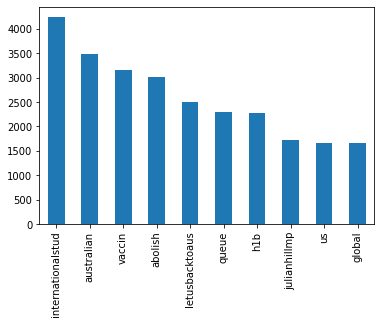

In [ ]:
tw = hero.visualization.top_words(df["Text"].pipe(hero.clean)).head(10)
tw.plot.bar()
tw.head(10)

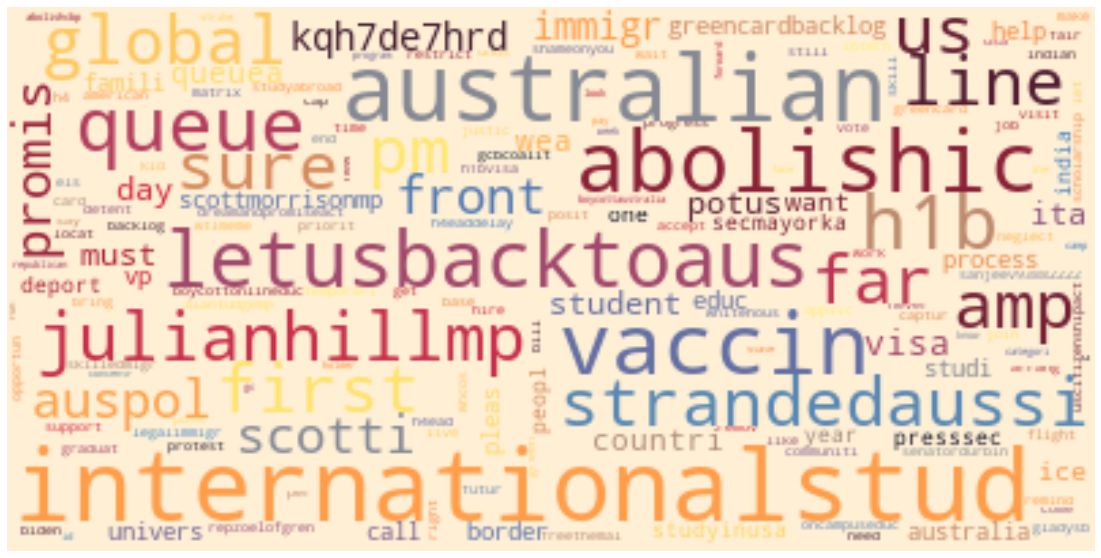

In [ ]:
hero.wordcloud(df["Text"].pipe(hero.clean))

In [ ]:
#Add pca value to dataframe to use as visualization coordinates
df['pca'] = (
            df['Text']
            .pipe(hero.tfidf)
            .pipe(hero.pca)
   ) 
#Add k-means cluster to dataframe 
df['kmeans'] = (
            df['Text']
            .pipe(hero.tfidf)
            .pipe(hero.kmeans)
   )
df.head()

,Tweet Id,Text,Name,Screen Name,UTC,Created At,Favorites,Retweets,Language,Client,Tweet Type,URLs,Hashtags,Mentions,Media Type,Media URLs,pca,kmeans
0,1.374886e+18,@abolishICE_nynj After living US nearly ...,carb,carbnim,2021-03-25T00:48:30.000Z,Thu Mar 25 00:48:30 +0000 2021,0,0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Retweet,NaN,1,4,photo,https://pbs.twimg.com/media/ExQFRz7WYAID7Av.jpg,"[-0.16163937557048472, -0.006852123089051344]",3
1,1.374886e+18,@abolishICE_nynj After living US nearly ...,JACL Seattle,jaclseattle,2021-03-25T00:47:52.000Z,Thu Mar 25 00:47:52 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/iphone"" r...",Retweet,NaN,1,4,photo,https://pbs.twimg.com/media/ExQFRz7WYAID7Av.jpg,"[-0.16163937557048513, -0.006852123089040624]",3
2,1.374885e+18,@womenbaseball1 #DefundPentagon\n#DefundPoli...,putting the fun in fungible,Lesley_NOPE,2021-03-25T00:44:51.000Z,Thu Mar 25 00:44:51 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/iphone"" r...",Retweet,NaN,3,0,NaN,NaN,"[-0.14616207440081683, -0.008875564423658036]",3
3,1.374885e+18,#DefundPentagon\n#DefundPolice\n#AbolishICE\nS...,Abolitionist,womenbaseball1,2021-03-25T00:43:51.000Z,Thu Mar 25 00:43:51 +0000 2021,1,1,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,NaN,3,0,NaN,NaN,"[-0.1462889657772779, -0.008952527733324129]",3
4,1.374883e+18,@VP @POTUS necessary #AbolishICE,AmyPond420,AmyPond420_,2021-03-25T00:35:46.000Z,Thu Mar 25 00:35:46 +0000 2021,0,0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Reply,NaN,1,2,NaN,NaN,"[-0.15829829975799656, -0.06018657838226817]",3


In [ ]:
#generate scatter plot
hero.scatterplot(df, 'pca', color = 'kmeans', hover_data=['Text '] )

In [ ]:
df.to_csv('intlstud.csv',index=False)